In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path_2019 = "..\data\obitos-2019.csv"
path_2020 = "..\data\obitos-2020.csv"
path_2021 = "..\data\obitos-2021.csv"

data_2019 = pd.read_csv(path_2019)
data_2020 = pd.read_csv(path_2020)
data_2021 = pd.read_csv(path_2021)

print(f"2019 - {data_2019.shape}")
print(f"2020 - {data_2020.shape}")
print(f"2021 - {data_2021.shape}")

2019 - (12380, 6)
2020 - (14872, 6)
2021 - (2719, 6)


In [78]:
data_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [79]:
data_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
2150,MG,PNEUMONIA,HOSPITAL,20 - 29,M,88
11440,RS,INDETERMINADA,VIA_PUBLICA,80 - 89,M,1
8111,RS,INSUFICIENCIA_RESPIRATORIA,DOMICILIO,60 - 69,M,77
2923,CE,OUTRAS,IGNORADO,30 - 39,M,209
8882,GO,COVID,OUTROS_SERVICOS_SAUDE,70 - 79,F,65


In [80]:
data_2021.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
1387,RS,PNEUMONIA,HOSPITAL,60 - 69,M,12
1486,AM,SRAG,HOSPITAL,70 - 79,M,3
476,SP,INDETERMINADA,DOMICILIO,30 - 39,M,1
2712,SP,OUTRAS,OUTROS_SERVICOS_SAUDE,N/I,I,1
444,RS,OUTRAS,DOMICILIO,30 - 39,M,2


In [81]:
print(len(data_2019["uf"].unique()))
print(len(data_2020["uf"].unique()))
print(len(data_2021["uf"].unique()))

27
27
27


In [82]:
data_2019["tipo_doenca"].unique()

array(['OUTRAS', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG', 'COVID'], dtype=object)

In [83]:
data_2020["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [84]:
data_2021["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INSUFICIENCIA_RESPIRATORIA', 'SEPTICEMIA',
       'PNEUMONIA', 'SRAG', 'INDETERMINADA'], dtype=object)

In [85]:
data_2019["tipo_doenca"].value_counts()

OUTRAS                        3845
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2323
SEPTICEMIA                    2063
INDETERMINADA                 1308
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [86]:
data_2020["tipo_doenca"].value_counts()

OUTRAS                        3789
INSUFICIENCIA_RESPIRATORIA    2329
PNEUMONIA                     2210
COVID                         2104
SEPTICEMIA                    2024
INDETERMINADA                 1338
SRAG                          1078
Name: tipo_doenca, dtype: int64

In [87]:
data_2021["tipo_doenca"].value_counts()

OUTRAS                        1067
COVID                          416
SEPTICEMIA                     378
PNEUMONIA                      372
INSUFICIENCIA_RESPIRATORIA     332
SRAG                            89
INDETERMINADA                   65
Name: tipo_doenca, dtype: int64

----
## Desafio 01: Acesse o portal da transparência e leia sobre como são feitas as classificações por tipo de óbito e como são obtidos os dados.

In [88]:
print(data_2019['local_obito'].unique().tolist())
print(data_2020['local_obito'].unique().tolist())
print(data_2021['local_obito'].unique().tolist())

['DOMICILIO', 'HOSPITAL', 'IGNORADO', 'OUTRO', 'VIA_PUBLICA', 'OUTROS_SERVICOS_SAUDE', 'AMBULANCIA', 'POSTO_SAUDE', 'SAMU']
['DOMICILIO', 'HOSPITAL', 'OUTRO', 'OUTROS_SERVICOS_SAUDE', 'VIA_PUBLICA', 'IGNORADO', 'AMBULANCIA', 'POSTO_SAUDE', 'SAMU']
['HOSPITAL', 'DOMICILIO', 'OUTROS_SERVICOS_SAUDE', 'IGNORADO', 'OUTRO', 'VIA_PUBLICA', 'POSTO_SAUDE']


In [89]:
print(data_2019['faixa_etaria'].unique().tolist())
print(data_2020['faixa_etaria'].unique().tolist())
print(data_2021['faixa_etaria'].unique().tolist())

['< 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '> 100', 'N/I']
['< 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '> 100', 'N/I']
['< 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '> 100', 'N/I']


### Dicionário de dados:###
* uf: unidade da federação (uma das 27);
* tipo_doenca: doenca que provocou o óbito (COVID, SEPTICEMIA, PNEUMONIA, INSUFICIÊNCIA RESPIRATÓRIA, SRAG ou INDETERMINADA);
* local_obito: local do óbito ('DOMICILIO', 'HOSPITAL', 'IGNORADO', 'OUTRO', 'VIA_PUBLICA', 'OUTROS_SERVICOS_SAUDE', 'AMBULANCIA', 'POSTO_SAUDE' ou 'SAMU');
* faixa_etaria: faixa etária ('< 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '> 100' ou 'N/I');
* sexo: M ou F;
* total: total de mortes do registro.

### Prazos###
A família tem até 24h após o falecimento para registrar o óbito em Cartório que, por sua vez, tem até cinco dias para efetuar o registro de óbito, e depois até oito dias para enviar o ato feito à Central Nacional de Informações do Registro Civil (CRC Nacional), que atualiza esta plataforma.

---
## Desafio 02: Nesta aula o Thiago quer fazer uma contagem dos números de casos, mas os dados não parecem corretos. Identifique o problema antes de seguir para o próximo vídeo e ajude a corrigir.

In [90]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12380 entries, 0 to 12379
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            12380 non-null  object
 1   tipo_doenca   12380 non-null  object
 2   local_obito   12380 non-null  object
 3   faixa_etaria  12380 non-null  object
 4   sexo          12378 non-null  object
 5   total         12380 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 580.4+ KB


In [91]:
# a única coluna numérica é total, portanto, será a única somada
total_obitos_2019 = data_2019.groupby('tipo_doenca').sum()
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6985
INSUFICIENCIA_RESPIRATORIA,100516
OUTRAS,659968
PNEUMONIA,226203
SEPTICEMIA,175439
SRAG,1498


In [92]:
# a única coluna numérica é total, portanto, será a única somada
total_obitos_2020 = data_2020.groupby('tipo_doenca').sum()
total_obitos_2020

,total
tipo_doenca,
COVID,193650
INDETERMINADA,9597
INSUFICIENCIA_RESPIRATORIA,98088
OUTRAS,683616
PNEUMONIA,180648
SEPTICEMIA,161559
SRAG,16429


In [93]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,193650.000000
INDETERMINADA,1.373944
INSUFICIENCIA_RESPIRATORIA,0.975845
OUTRAS,1.035832
PNEUMONIA,0.798610
SEPTICEMIA,0.920884
SRAG,10.967290


In [94]:
# a única coluna numérica é total, portanto, será a única somada
total_obitos_2021 = data_2021.groupby('tipo_doenca').sum()
total_obitos_2021

,total
tipo_doenca,
COVID,2956
INDETERMINADA,82
INSUFICIENCIA_RESPIRATORIA,753
OUTRAS,5594
PNEUMONIA,1379
SEPTICEMIA,1371
SRAG,144


----

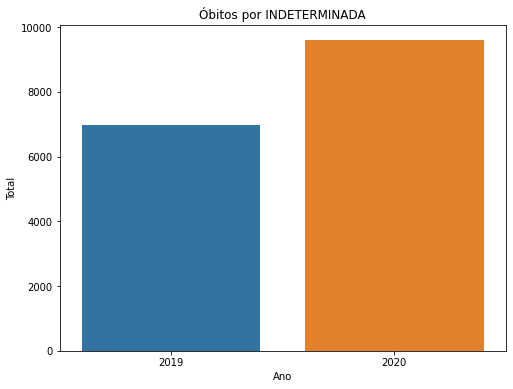

In [103]:
def grafico_comparativo(causa):
    total_2019 = data_2019.groupby("tipo_doenca").sum()
    total_2020 = data_2020.groupby("tipo_doenca").sum()
    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    data = pd.DataFrame({"Total" : lista,
                          "Ano": [2019, 2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x="Ano", y="Total", data = data)
    plt.title(f"Óbitos por {causa}")
    plt.show()


grafico_comparativo("INDETERMINADA")

In [75]:
total_obitos_2019.loc["SRAG"]

total    1498
Name: SRAG, dtype: int64